<a href="https://www.kaggle.com/code/nirmit27/rocks-versus-mines?scriptVersionId=175081785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression as LR

from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import confusion_matrix as CM

# SONAR **Rock vs. Mine** Prediction
---

### Importing the dataset

In [2]:
path_ = ""

for dirname, _, filenames in os.walk("/kaggle/input/"):
    for filename in filenames:
        if "sonar" in filename:
            path_ = os.path.join(dirname, filename)
            
# path_
df = pd.read_csv(path_, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Target labels
- `M` represents a **Mine**
- `R` represents a **Rock**

In [4]:
df.iloc[:, 60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

### Average readings
> Finding out the **differences** in readings based on labels.

In [5]:
df.groupby([60]).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


### Features and target

In [6]:
X = df.drop(columns=[60]).values
y = df.iloc[:, 60].values

X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

### Splitting the dataset with stratification
> The `stratify` parameter will ensure that the number of **rocks** and **mines** are evenly distributed between training and testing data samples.

![Stratification](https://media.geeksforgeeks.org/wp-content/uploads/20231226151651/Startified-Sampling.png)

In [7]:
test_size = 0.1
X_train, X_test, y_train, y_test = tts(X, y, test_size=test_size, stratify=y, random_state=42)

X_test

array([[0.0068, 0.0232, 0.0513, ..., 0.0052, 0.0194, 0.0105],
       [0.0096, 0.0404, 0.0682, ..., 0.0036, 0.0043, 0.0018],
       [0.0116, 0.0744, 0.0367, ..., 0.0044, 0.0057, 0.0035],
       ...,
       [0.0762, 0.0666, 0.0481, ..., 0.0048, 0.0107, 0.0094],
       [0.0181, 0.0146, 0.0026, ..., 0.0048, 0.0089, 0.0085],
       [0.053 , 0.0885, 0.1997, ..., 0.0146, 0.0134, 0.0056]])

### Training the model

In [8]:
model = LR()
model.fit(X_train, y_train)

model

LogisticRegression()

### Model evaluation

In [9]:
y_pred = model.predict(X_test)

print(f"Model accuracy : {round(accuracy(y_test, y_pred) * 100, 2)}%")

Model accuracy : 85.71%


### Confusion Matrix

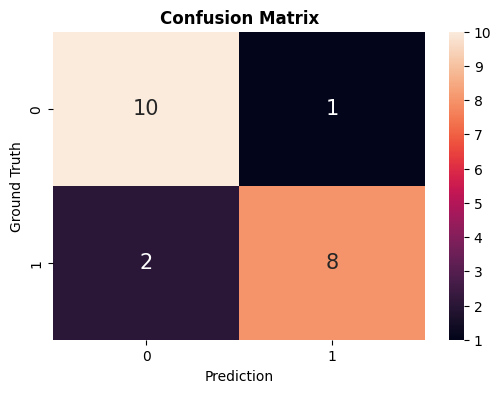

In [10]:
plt.figure(figsize=(6, 4))

cm = CM(y_test, y_pred)
sns.heatmap(cm, annot=True, annot_kws={"size": 15})

plt.title("Confusion Matrix", fontweight='bold', fontsize=12)
plt.xlabel("Prediction", fontsize=10)
plt.ylabel("Ground Truth", fontsize=10)

plt.show()

### Prediction System

In [11]:
input_data = X[121, :]

input_data = np.array(input_data).reshape(1, -1)

pred = model.predict(input_data)
print("It's just a ROCK.") if pred[0] == 'R' else print("ALERT! A MINE has been detected!")

ALERT! A MINE has been detected!
